In [1]:
# import modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/SamithaPrabath/course-finder/master/risk_calculate.csv')

# Drop rows with missing values
data = data.dropna()

In [3]:
# Preprocess the data
label_encoder = LabelEncoder()
data['university_encoded'] = label_encoder.fit_transform(data['University'])
data['course_encoded'] = label_encoder.fit_transform(data['Specialization (Only for IT graduates/undergraduates)'])

In [4]:
# function for save mappings to json file
def create_json_file(file_name, encoded_list, pure_list):
  mapping ={}
  for i in range(len(encoded_list)):
    if pure_list[i] not in mapping:
      try:
        mapping[pure_list[i]] = int(encoded_list[i])
      except:
        continue

  filename = file_name
  with open(filename, 'w') as file:
    json.dump(mapping, file)

In [5]:
# call function to create json files
create_json_file('university_encoded.json', data['university_encoded'], list(data['University']))
create_json_file('course_encoded.json', data['course_encoded'], list(data['Specialization (Only for IT graduates/undergraduates)']))

In [6]:
# set x and y varibles
target = 'Duration Of course '
X = data[['university_encoded', 'course_encoded', 'Applied Loan Amount', 'Year Of Course', 'GPA']]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.039086138613861385


In [7]:
# function for read json file and mapping
def map_jason(file_name, value):
  with open(file_name, 'r') as file:
    data_read = json.load(file)
    for key in data_read:
      if key == value:
        return data_read[key]

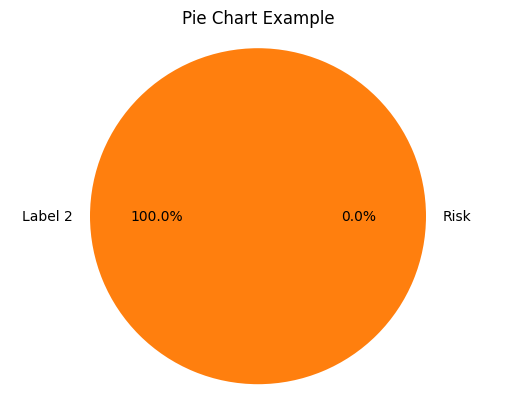

In [14]:
# Example usage: Predict the course duration for new inputs
data = {
    'University': ['SLIIT'],
    'Specialization (Only for IT graduates/undergraduates)': ['Information Systems Engineering'],
    'Applied Loan Amount': [100000],
    'Year Of Course': [4],
    'GPA': [3.7]
}
data = pd.DataFrame(data)
label_encoder = LabelEncoder()
data['university_encoded'] = map_jason('university_encoded.json', data['University'][0])
data['course_encoded'] = map_jason('course_encoded.json', data['Specialization (Only for IT graduates/undergraduates)'][0])


X_test = data[['university_encoded', 'course_encoded', 'Applied Loan Amount', 'Year Of Course', 'GPA']]

# Make predictions using the trained model
predictions = model.predict(X_test)

data_1 = predictions - data['Year Of Course'][0]
data_2 = 1 - (predictions - data['Year Of Course'][0])

labels = ['Risk', 'Label 2']
sizes = [data_1[0], data_2[0] ]  # The values representing the sizes of each slice

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.axis('equal')

plt.title('Pie Chart Example')

plt.show()
